In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence
from pandas.plotting import scatter_matrix 
from mpl_toolkits.mplot3d import Axes3D
import collections
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df=pd.read_csv('datasets/Boston.csv')
y=df.crim
simple_coeff=collections.defaultdict(list)
print('predictor p-value')
for i in list(df.drop('crim',axis=1)):
    X=sm.add_constant(df[i])
    model=sm.OLS(y,X)
    est=model.fit()
#     print(est.summary())
    print(i,est.pvalues[1])
    print('\n \n')
    simple_coeff[i]=est.params[1]



predictor p-value
zn 5.506472107679307e-06

 

indus 1.4503489330272395e-21

 

chas 0.2094345015352004

 

nox 3.751739260356923e-23

 

rm 6.346702984687839e-07

 

age 2.8548693502441573e-16

 

dis 8.519948766926326e-19

 

rad 2.6938443981864414e-56

 

tax 2.357126835257048e-47

 

ptratio 2.942922447359816e-11

 

black 2.487273973773734e-19

 

lstat 2.6542772314731968e-27

 

medv 1.1739870821943694e-19

 



In [4]:
X=sm.add_constant(df.iloc[:,1:])
y=df.crim
model1=sm.OLS(y,X)
estimate=model1.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.57e-56
Time:                        12:04:05   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

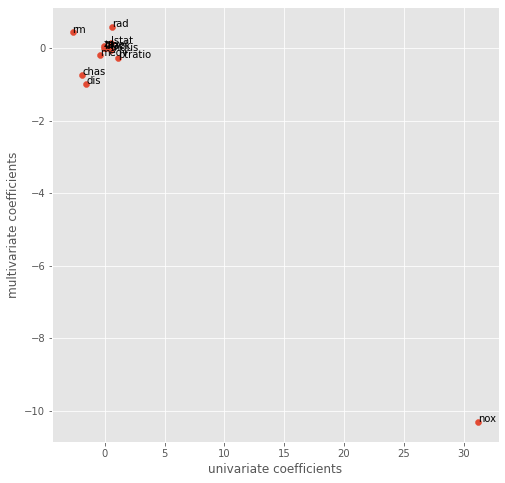

In [5]:
# multiple linear regression
multi_coeff=estimate.params[1:]
simple_coeffs=pd.Series(simple_coeff)
simple_coeffs=simple_coeffs[0:]
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(simple_coeffs.values,multi_coeff.values)
ax.set_xlabel('univariate coefficients')
ax.set_ylabel('multivariate coefficients')
for label in list(df.drop('crim',axis=1)):
    plt.annotate(label,xy=(simple_coeffs[label],multi_coeff[label]))

In [27]:
for label in list(df.drop('crim',axis=1)):
    df['x1']=df[label]
    df['x2']=df[label]**2
    df['x3']=df[label]**3
    model_poly = smf.ols('crim ~ x1 + x2+ x3 ', data = df)
    estimate_poly = model_poly.fit()
    print(estimate_poly.summary())
    print('\n \n')
    

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.28e-06
Time:                        19:24:05   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8461      0.433     11.192      0.0

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.02e-20
Time:                        19:24:05   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5488      2.769     -0.920      0.3

strong multicollinearity or other numerical problems.

 

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.35e-26
Time:                        19:24:05   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                      -0.174
Model:                            OLS   Adj. R-squared:                 -0.174
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 13 Apr 2021   Prob (F-statistic):                nan
Time:                        19:24:06   Log-Likelihood:                -1846.9
No. Observations:                 506   AIC:                             3696.
Df Residuals:                     505   BIC:                             3700.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  1.326e-122  1.15e-122      1.157      0.2

C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\user\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
